# Import Tools Needed & Review Correct Data

In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# the code below allows you to access your Google Drive. It'll
# ask you to login and verity that you want to use it
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# root_dir is the path to My_Drive folder.
root_dir = "/content/drive/My Drive/"

#accessing data folder
data_folder = root_dir + "Colab Notebooks/MPP Science Replication Package/Data/csv"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
#accessing the clean data that I'll be working with in the folder
survey_df = pd.read_csv('survey_df1.csv')
#print first 5 ust to look at data
survey_df.head()

,id,resp_male,resp_age,resp_black,resp_highed,el_flushot,authority,video_race,concordant,video_length,watch_video,rating_trust,rating_qualified
0,18197,1,39.0,1,2,Unknown,doc,0,0,long,1,6,6
1,5465,1,46.0,1,2,Unknown,doc,0,0,short,1,5,6
2,7534,1,31.0,1,2,Unknown,doc,0,0,short,1,6,5
3,5456,1,47.0,1,2,Unknown,lay,1,1,short,1,5,5
4,4758,1,39.0,1,2,Unknown,doc,0,0,long,1,5,5


print to get info of data types

In [ ]:
#.info() to get data types
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2893 non-null   int64  
 1   resp_male         2893 non-null   int64  
 2   resp_age          2893 non-null   float64
 3   resp_black        2893 non-null   int64  
 4   resp_highed       2893 non-null   int64  
 5   el_flushot        2893 non-null   object 
 6   authority         2893 non-null   object 
 7   video_race        2893 non-null   int64  
 8   concordant        2893 non-null   int64  
 9   video_length      2893 non-null   object 
 10  watch_video       2893 non-null   int64  
 11  rating_trust      2893 non-null   int64  
 12  rating_qualified  2893 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 293.9+ KB


### When I first started I was going to use a logistic regression to try and evaluate the **`'Unknown'`** values in **`'el_flushot'`** but I instead took the data to k-means in order to evaluate groups! This happened during my first Logistic Regression Model, you will see this after I complete LR.

# **1. Choose a Model - LOGISTIC REGRESSION**


---

I chose logistic regression because I can highlight the binary result of whether an individual receives a flu shot or not, allowing me to examine patterns in behavior.


`'el_flushot'` equals `1` if the respondent received their flu shot. `0` means the person didn't hvae their flu shot and `'Unknown'` if the respondant chose not to respond.

- We're going to build a model to try to predict whether a person, based on their data, would participate in vaccination/speaking about their vaccination.


In [ ]:
# look at every column and get the total number of 0 values
(survey_df[:] == 0).sum()

,0
id,0
resp_male,0
resp_age,0
resp_black,1221
resp_highed,0
el_flushot,0
authority,0
video_race,1441
concordant,1434
video_length,0


## **What I notice:**
---
**`'el_flushot'`** is not accouted for - because it was transformed into an object to account for the `'Unknown'` I will need to transform that to `'int'` in order to work on it for logistic regression

**`'authority'`** also needs to be transformed because it can be either lay or doc
  - therefore 1 = `'doc'` 0 = `'lay' `
  - I can also rename to 'auth_doc' for readibility amongst other data scientist

**`'resp_highed'`** needs to be chnaged to `'0'`'s and `'1'`'s instead of `'1'`'s and `'2'`'s

**`'video_length'`** also can be changed from `'short'` and `'long'` to `'1'`'s and `'0'`'s


All respondents (no other value) | even though includes zero's if inputed:
**`'watch_video'`**
**`'resp_male'`**

The only ones other ones we would look to add means because they are continous are the **`'rating_'`** columns but all have no `'0'` cases

# **2.1 Preprocessing - Clean Data**

## **Changing to binary objects**

In [ ]:
#change the names of the columns I am manipulating
#just changed resp_highed(u) because needed some differentiation to flow for my process
survey_df = survey_df.rename(columns={'authority': 'auth_doc','resp_highed':'resp_highedu','video_length': 'video_long',})

### **Change `'authority'`**

In [ ]:
#evaluate dtype and value counts
survey_df['auth_doc'].value_counts()

,count
auth_doc,
doc,2463
lay,430


In [ ]:
#change to binary values/bool
survey_df['auth_doc'] = survey_df['auth_doc'].map({'doc': 1, 'lay': 0}).astype('int')

#check
assert survey_df['auth_doc'].value_counts()[1] == 2463
assert survey_df['auth_doc'].value_counts()[0] == 430

In [ ]:
#check values transfered visually
survey_df['auth_doc'].value_counts()

,count
auth_doc,
1,2463
0,430


### **Change `'resp_highed'`**

In [ ]:
#evaluate dtype and value counts
survey_df['resp_highedu'].value_counts()

,count
resp_highedu,
2,2555
1,338


In [ ]:
#change to binary values/bool
survey_df['resp_highedu'] = survey_df['resp_highedu'].map({1: 0, 2: 1}).astype('int')

#check
assert survey_df['resp_highedu'].value_counts()[1] == 2555
assert survey_df['resp_highedu'].value_counts()[0] == 338

In [ ]:
#check values transfered visually
survey_df['resp_highedu'].value_counts()

,count
resp_highedu,
1,2555
0,338


### **Change `'video_length'`**

In [ ]:
survey_df['video_long'].value_counts()

,count
video_long,
short,2483
long,410


In [ ]:
#binary representation - '1' if True and video 'long' | '0' if False and video is 'short'
survey_df['video_long'] = survey_df['video_long'].map({'short': 0, 'long': 1}).astype('int')

#check
assert survey_df['video_long'].value_counts()[0] == 2483
assert survey_df['video_long'].value_counts()[1] == 410

In [ ]:
#check values transfered visually
survey_df['video_long'].value_counts()

,count
video_long,
0,2483
1,410


### **Check/Visualize Results**

In [ ]:
survey_df[['auth_doc', 'resp_highedu', 'video_long' ]].head(20)
#did 20 because I wanted to see a 'resp_highedu' value to appear as the False/0

,auth_doc,resp_highedu,video_long
0,1,1,1
1,1,1,0
2,1,1,0
3,0,1,0
4,1,1,1
5,1,1,0
6,0,1,0
7,1,1,0
8,1,1,0
9,1,1,0


In [ ]:
#evaluate all datatypes
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2893 non-null   int64  
 1   resp_male         2893 non-null   int64  
 2   resp_age          2893 non-null   float64
 3   resp_black        2893 non-null   int64  
 4   resp_highedu      2893 non-null   int64  
 5   el_flushot        2893 non-null   object 
 6   auth_doc          2893 non-null   int64  
 7   video_race        2893 non-null   int64  
 8   concordant        2893 non-null   int64  
 9   video_long        2893 non-null   int64  
 10  watch_video       2893 non-null   int64  
 11  rating_trust      2893 non-null   int64  
 12  rating_qualified  2893 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 293.9+ KB


Perfect - All that's left to clean is `'el_flushot'`


## **Clean up and seperate `'el_flushot'`**


---
### there are 3 cases in the column:

`1` = got the flu shot
`0` = did not get the flu shot
`'Unknown'` = respondent did not answer


In [ ]:
# create seperate dataframes for bool and 'unknown' values
resp_known = survey_df[survey_df['el_flushot'].isin(['0', '1'])].copy()
resp_unknown = survey_df[survey_df['el_flushot'] == 'Unknown']

In [ ]:
#transform into binary dtyoe
resp_known['el_flushot'] = resp_known['el_flushot'].astype(int)

#confirm
assert resp_known['el_flushot'].dtypes == int

In [ ]:
#confirm visually
resp_known['el_flushot'].value_counts()

,count
el_flushot,
1,499
0,166


In [ ]:
#confirm we didn't lose data
assert resp_unknown['el_flushot'].value_counts().sum() + resp_known['el_flushot'].value_counts().sum() == 2893

#confirm visually
resp_unknown['el_flushot'].value_counts()

,count
el_flushot,
Unknown,2228


Everything is clean, lets move to Standardizing the Data

# **2.2 Preprocessing - Standardize Data**

In [ ]:
def standardize(data):
  """
  given a column of data, return a new column with all values standardized
  using z-score normalization.

  Arguments:
    data: Pandas column

  Return:
    Pandas column with values z-score standardized
  """
  mean = np.mean(data)
  std = np.std(data)

  standardized_data = (data - mean) / std
  return standardized_data

In [ ]:
resp_known_df = resp_known.copy() #create df

# standardize all columns numeric (non-bool) columns
for column in ['resp_age', 'rating_trust', 'rating_qualified']:  # example numeric columns
    resp_known_df[column] = standardize(resp_known_df[column])


# **2.3 Preprocessing - Split Data**


---



#### **Splitting the data into input variables and the outcome variable**

In [ ]:
# split the predictors and 'el_flushot' variables.
# X will be the predictor or respondent input. That's going to be everything
# in survey_df1 *except* the 'el_flushot' variable

X = resp_known_df.drop(columns='el_flushot')

# y will hold the outcomes
y = resp_known_df['el_flushot']

print("Shape of X:", X.shape, " Shape of y:", y.shape)


Shape of X: (665, 12)  Shape of y: (665,)


#### **Splitting the data into training and test data**

In [ ]:
# import the function train_test_split from the model_selection module of scikit-learn
from sklearn.model_selection import train_test_split

# split the data into training and test sets
#20% as requested in assignment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (532, 12)
Test set shape: (133, 12)


# **3. Train the Model**

---



#### **Building and training the model**

In [ ]:
#import LogisticRegression from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression

# create an instance of LogisticRegression. set the random_state
# so we can reproduce the model results if needed.

#i got an error message(see below) so I added max_iter = 1000
#/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

# Increase the number of iterations (max_iter) or scale the data as shown in:
#     https://scikit-learn.org/stable/modules/preprocessing.html
# Please also refer to the documentation for alternative solver options:
#     https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#   n_iter_i = _check_optimize_result(

# LogisticRegression
# ?i
# LogisticRegression(random_state=16)

model = LogisticRegression(random_state=16, max_iter=1250)

# train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1250, random_state=16)

#### **Making predictions with our model**

In [ ]:
# call predict on the test data to generate predictions
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

I got only 1's, so Im going to add `class_weight='balanced'`

In [ ]:
model = LogisticRegression(random_state=16, max_iter=1250, class_weight='balanced')

# train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1250, random_state=16)

In [ ]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0])

In [ ]:
y_test.value_counts()

,count
el_flushot,
1,89
0,44


In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 64]
 [ 1 69]]


We can see that our model predicted `'el_flushot'` for 69 respondents: The true value from `y_test` is 89 repondents. Let's dig a little deeper with a **confusion matrix**.

# **4.1 Evaluation**

#### **Evaluating classification models with confusion matrices**

In [ ]:
# import confusion_matrix from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix

# generate the confusion matrix
confusion_matrix(y_test, predictions)

array([[28, 16],
       [36, 53]])

The confusion matrix is in the form of a 2x2 array. There are two classes, 0 and 1. The diagonal of the matrix represents accurate predictions, and the non-diagonal elements are incorrect predictions. So we have 28 and 53 as actual predictions, 36 and 16 as incorrect predictions.  


##### ***Let's display the 2x2 array as a heatmap.***

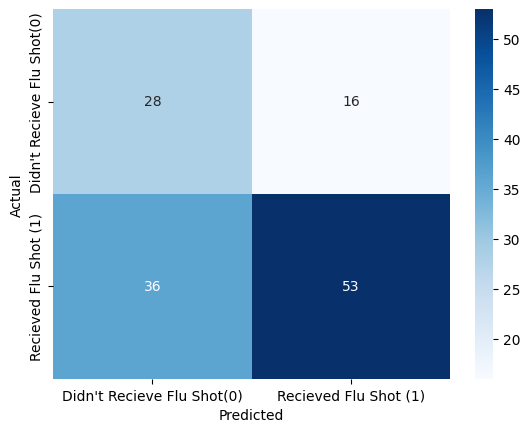

In [ ]:
class_names = ["Didn't Recieve Flu Shot(0)", "Recieved Flu Shot (1)"]

_ = sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,   # annotate the map with the matrix values
    fmt='g',      # this gets us integers for the annotated numbers
    cmap='Blues', # blue color map
    xticklabels=class_names,
    yticklabels=class_names
    )
_ = plt.xlabel('Predicted')
_ = plt.ylabel('Actual')

The model correctly predicted a respondent receiving a flu shot 53 times.

# **4.1 Evaluation - Classification Report**

In [ ]:
# import classification_report
from sklearn.metrics import classification_report

# generate the classification report
class_names = ["Didn't Recieve Flu Shot(0)", "Recieved Flu Shot (1)"]
print(classification_report(y_test, predictions, target_names=class_names))


                            precision    recall  f1-score   support

Didn't Recieve Flu Shot(0)       0.44      0.64      0.52        44
     Recieved Flu Shot (1)       0.77      0.60      0.67        89

                  accuracy                           0.61       133
                 macro avg       0.60      0.62      0.59       133
              weighted avg       0.66      0.61      0.62       133




**`accuracy`** -  Our model has an accuracy of 0.61. accuracy is the ratio of total correct predictions (28 + 53) to the total predictions (28 + 53 + 36 + 16).


---


**`'precision'`** measures a model's True Positive predictions. It's the ratio of true positive predictions (53) over the total positive predictions (53 + 16). We see a 0.77 score for precision.


---



**`'recall'`** is the ratio of True Positives (40) to the sum True Positives and False Negatives (53 + 36). Our model has a recall value of 0.60.

---



**`'f1-score'`** combines precision and recall &mdash; we have a 0.67 F1-score.

#### **Receiver Operating Characteristic (ROC) curve**

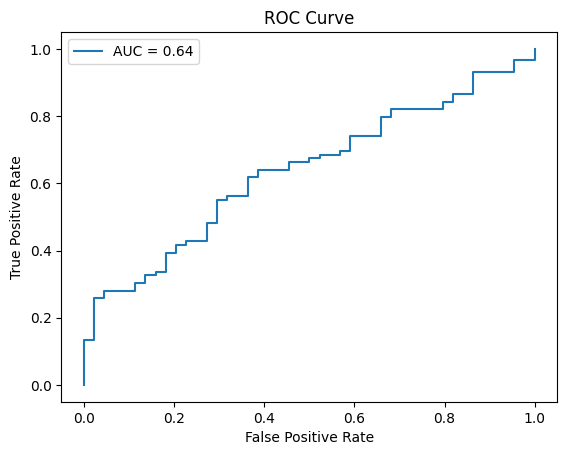

In [ ]:
from sklearn import metrics

# predict the probabilities of the test data
y_pred_probability = model.predict_proba(X_test)[::, 1]

# compute the false positive rate and true positive rate
false_pos_rate, true_pos_rate, _ = metrics.roc_curve(y_test, y_pred_probability)

# AUC scores give us good info about the classifier's worth
auc = metrics.roc_auc_score(y_test, y_pred_probability)

plt.plot(false_pos_rate, true_pos_rate, label="AUC = " + "%.2f" % auc)


#_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.title('ROC Curve')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='best')


The AUC score for the model is 0.64. AUC scores of 1 mean we have a perfect classifier; scores of 0.5 mean are classifier is junk. We're doing good with this model.

# Transtioning to think about the **`'Unknown'`** Values

---

#### I will be using k-means to explore whether those who answer `'Unknown'` to `'el_flushot'` form a disctint group based on their demographics.

# ***Preprocessing***

In [ ]:
#bring back variable before that held unknown values:
resp_unknown['el_flushot'].value_counts()

,count
el_flushot,
Unknown,2228


In [ ]:
#confirming the df
resp_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2892
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2228 non-null   int64  
 1   resp_male         2228 non-null   int64  
 2   resp_age          2228 non-null   float64
 3   resp_black        2228 non-null   int64  
 4   resp_highedu      2228 non-null   int64  
 5   el_flushot        2228 non-null   object 
 6   auth_doc          2228 non-null   int64  
 7   video_race        2228 non-null   int64  
 8   concordant        2228 non-null   int64  
 9   video_long        2228 non-null   int64  
 10  watch_video       2228 non-null   int64  
 11  rating_trust      2228 non-null   int64  
 12  rating_qualified  2228 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 243.7+ KB


#### ***Creating a numeric columns***

In [ ]:
# Select relevant columns for clustering
# include demographic that might influence responses
  # male and watch video not needed
features_for_clustering = ['resp_age', 'resp_black', 'resp_highedu','auth_doc','video_race', 'concordant', 'video_long','rating_trust','rating_qualified']

X_unknown = resp_unknown[features_for_clustering]

# ***Standardizing***

#### ***Scaling***

In [ ]:
# import MaxMinScaler from sklearn
from sklearn.preprocessing import Normalizer

# set scaler to a Normalizer()  object
scaler = Normalizer()# YOUR CODE HERE

#use .fit_transform() on the scaler with the numeric data as its argument
scaled_data = scaler.fit_transform(X_unknown)

# scaled_data is a numpy array. We want a dataframe...use pd.DataFrame
# you should also set scaled_data's columns to be the same as features_for_clustering
scaled_data = pd.DataFrame(scaled_data, columns=features_for_clustering)    # FILL IN ARGUMENTS TO pd.DataFrane

# let's see the transformation
scaled_data.head()

,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified
0,0.975915,0.025023,0.025023,0.025023,0.000000,0.000000,0.025023,0.150141,0.150141
1,0.985212,0.021418,0.021418,0.021418,0.000000,0.000000,0.000000,0.107088,0.128506
2,0.968277,0.031235,0.031235,0.031235,0.000000,0.000000,0.000000,0.187409,0.156174
3,0.987997,0.021021,0.021021,0.000000,0.021021,0.021021,0.000000,0.105106,0.105106
4,0.982708,0.025198,0.025198,0.025198,0.000000,0.000000,0.025198,0.125988,0.125988


# ***Building the Model***

---



#### I have roughly the same amount of data as the spofity example so I used the same `SEED` and `range`

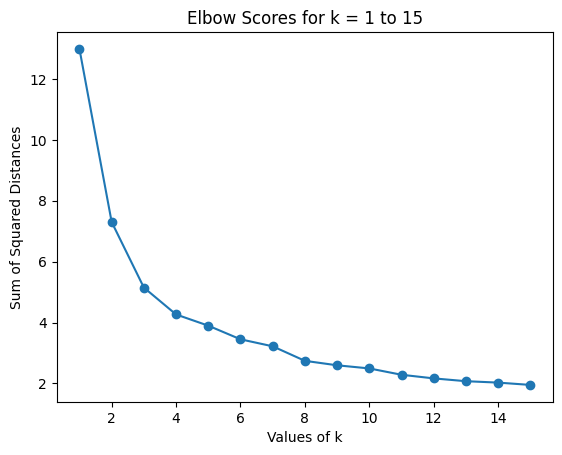

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SEED = 4999
elbow_scores = []

# loop for k=1 to k=15
for k in range(1, 16):
    untrained_kmeans = KMeans(n_clusters=k, random_state=SEED)
    trained_kmeans = untrained_kmeans.fit(scaled_data)
    elbow_scores.append(trained_kmeans.inertia_)

plt.plot(range(1, 16), elbow_scores, marker='o')
plt.xlabel("Values of k")
plt.ylabel("Sum of Squared Distances")
plt.title(f"Elbow Scores for k = 1 to {len(elbow_scores)}")
plt.show()


Three looks like a good spot for the elbow. Create a KMeans model with $k$=3 and make your predictions on the scaled data.

In [ ]:
# create an untrained KMeans model with k=6 and random_state = SEED
k_means = KMeans(n_clusters = 3,
    init='random',
    n_init=10,
    max_iter=100,
    random_state = SEED)  # Fill in the arguments

# fit the model on scaled_data with .fit()
trained_model = k_means.fit(scaled_data)

# use .predict assign a set of cluster predictions to clusters
clusters = trained_model.predict(scaled_data)# Fill in code here

# Add the clusters as a new column to the unknown dataframe.
resp_unknown['cluster'] = clusters

/tmp/ipython-input-3014290623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_unknown['cluster'] = clusters


Error message so I'm going to copy onto resp_unknown_df

In [ ]:
resp_unknown_df = resp_unknown.copy()

In [ ]:
# create an untrained KMeans model with k=6 and random_state = SEED
k_means = KMeans(n_clusters = 3,
    init='random',
    n_init=10,
    max_iter=100,
    random_state = SEED)  # Fill in the arguments

# fit the model on scaled_data with .fit()
trained_model = k_means.fit(scaled_data)

# use .predict assign a set of cluster predictions to clusters
clusters = trained_model.predict(scaled_data)# Fill in code here

# Add the clusters as a new column to the unknown dataframe.
resp_unknown_df['cluster'] = clusters

In [ ]:
resp_unknown_df['cluster'].value_counts()

,count
cluster,
2,1244
0,770
1,214


#### ***Silhouette Scores***

In [ ]:
from sklearn.metrics import silhouette_score

# calculate the silhouette score() for the clusters.
# This takes the scaled_data and clusters as arguments
silhouette_score(scaled_data,resp_unknown_df['cluster']) # YOUR CODE HERE

np.float64(0.35869069822598787)

A value of 0.358 tells us that the clusters have some overlap and aren't cleanly separated. It'd be helpful to see what this looks like.

Use Seaborn library to make a scatterplot of trust vs qualification

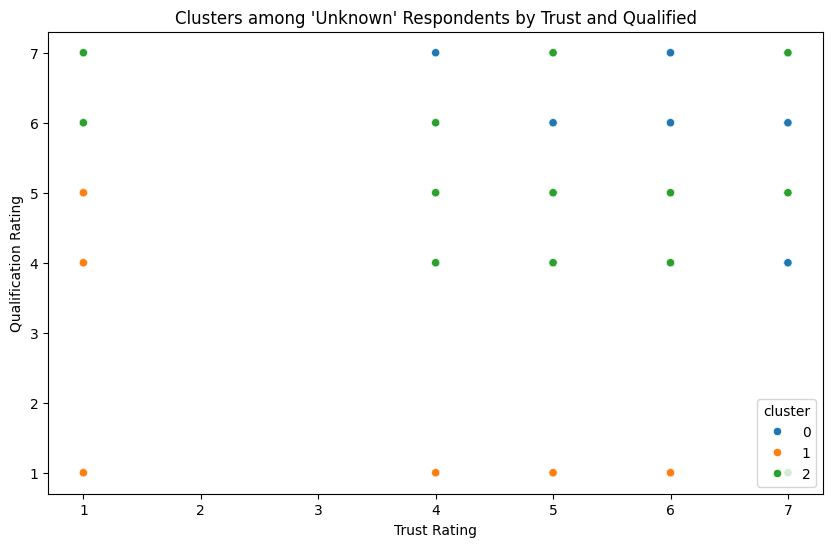

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=resp_unknown_df, x='rating_trust', y='rating_qualified', hue='cluster', palette='tab10')
plt.title("Clusters among 'Unknown' Respondents by Trust and Qualified")
plt.xlabel("Trust Rating")
plt.ylabel("Qualification Rating")
plt.show()

#### **Implement Jitter as suggested by Dr.Klugman**

---


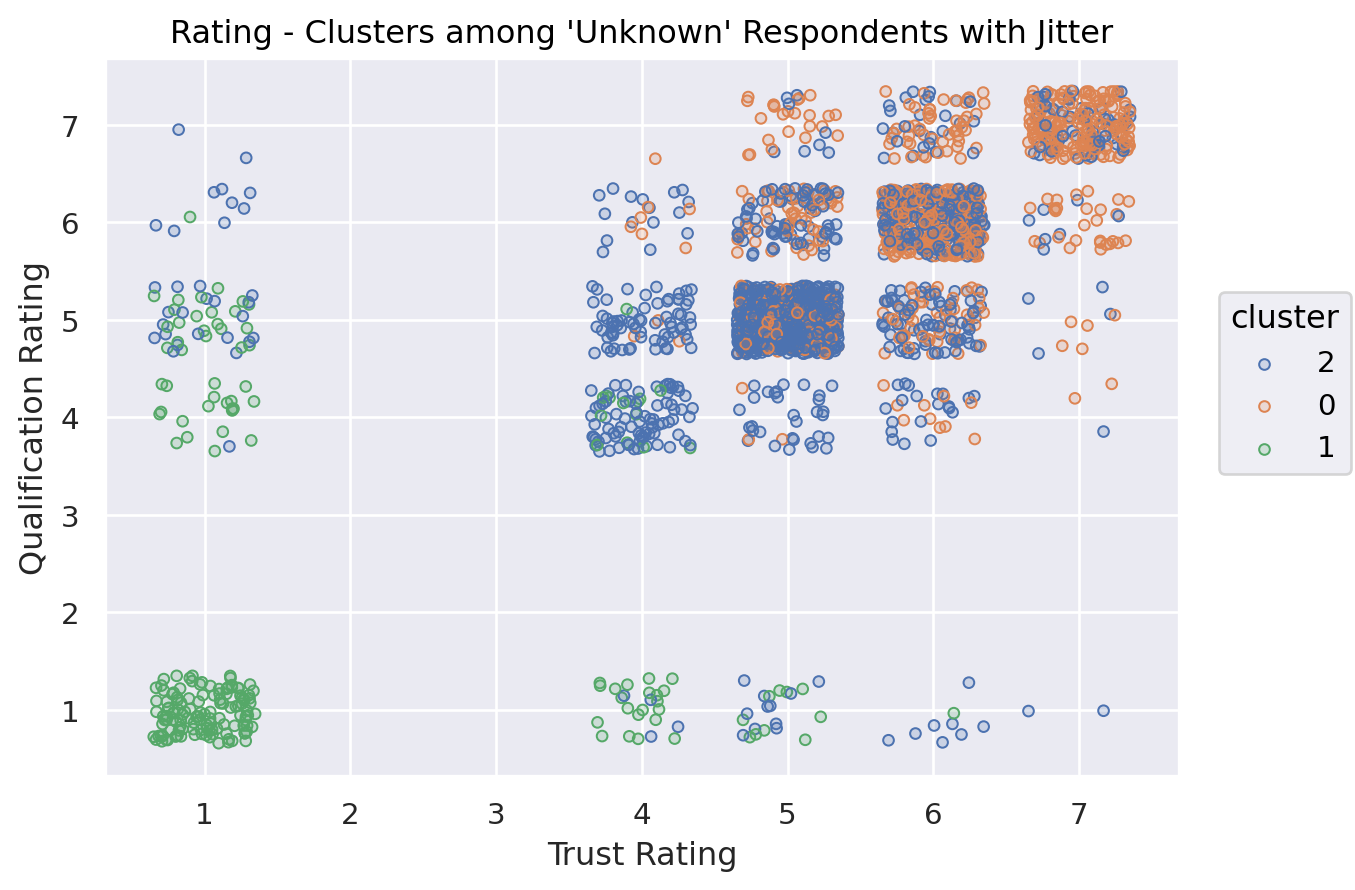

In [ ]:
import seaborn.objects as so

# Map clusters to specific colors | it kept placing it into 5 colors, I only had 3 clusters
cluster_colors = {0: "0", 1: "1", 2: "2"}

(
    so.Plot(
        resp_unknown_df["rating_trust"],
        resp_unknown_df["rating_qualified"],
        color=resp_unknown_df["cluster"].map(cluster_colors)  # force 3 colors
    )
    .add(so.Dots(), so.Jitter(x=0.7, y=0.7))
    .label(
        x="Trust Rating",
        y="Qualification Rating",
        title="Rating - Clusters among 'Unknown' Respondents with Jitter"
    )
)


**Quick Note - I really like jitter!**

INSIGHTS |
Group 1 has very low trust and rating
Group 0 has very high trust and rating
Group 2 is all over the place

Bar Chart to evaluate `resp_black` in each cluster

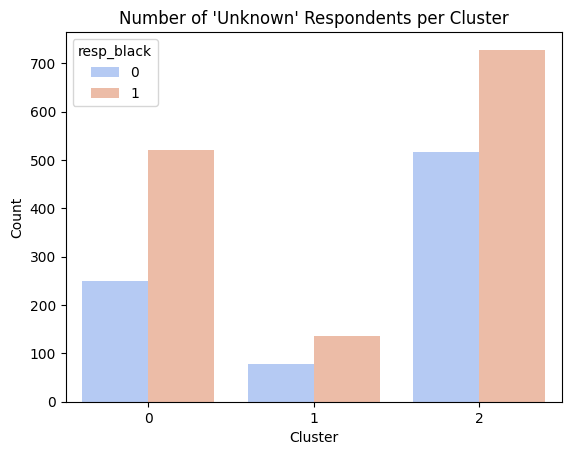

In [ ]:
#race division amognst clusters
sns.countplot(data=resp_unknown_df, x='cluster',hue='resp_black', palette='coolwarm')
plt.title("Number of 'Unknown' Respondents per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

####***Variance***

In [ ]:
centroids = k_means.cluster_centers_
display(centroids)

array([[0.96136565, 0.02130582, 0.02759342, 0.02712322, 0.01523336,
        0.01530539, 0.0059819 , 0.18738405, 0.18917709],
       [0.99512391, 0.01727633, 0.02407613, 0.01977608, 0.01436311,
        0.01469269, 0.00339912, 0.04453043, 0.05004171],
       [0.9811594 , 0.01516784, 0.02241535, 0.02137218, 0.0128173 ,
        0.0131165 , 0.00337786, 0.12903395, 0.13079815]])

In [ ]:
from collections import defaultdict

max = len(centroids[0])
variance_dict = defaultdict()

for i in range(max):
    column_name = resp_unknown_df.columns.values[i]
    centroid_var = centroids[:, i].var()
    variance_dict[column_name] = centroid_var

dict(variance_dict)

{'id': np.float64(0.00019182442759175405),
 'resp_male': np.float64(6.4841549041499185e-06),
 'resp_age': np.float64(4.660202090573862e-06),
 'resp_black': np.float64(9.955839429082062e-06),
 'resp_highedu': np.float64(9.982517144131945e-07),
 'el_flushot': np.float64(8.501118324530108e-07),
 'auth_doc': np.float64(1.4946935403304897e-06),
 'video_race': np.float64(0.0034391929106338958),
 'concordant': np.float64(0.0032542619217098365)}

# ***Evaluate***

In [ ]:
# Grouping by cluster
cluster_group  = resp_unknown_df.groupby('cluster')[['resp_age', 'resp_black', 'resp_highedu','auth_doc','video_race', 'concordant', 'video_long','rating_trust','rating_qualified']]

# we'll keep the size of each cluster
size = cluster_group.size()

# and we'll set the columns to their means in each cluster
cluster_group = cluster_group.mean()

# add size as a column
cluster_group['size'] = size

display(cluster_group)

,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,rating_trust,rating_qualified,size
cluster,,,,,,,,,,
0,31.066234,0.676623,0.880519,0.868831,0.483117,0.484416,0.190909,6.010390,6.074026,770
1,37.850467,0.630841,0.887850,0.728972,0.537383,0.542056,0.126168,1.700935,1.915888,214
2,39.387460,0.585209,0.877814,0.845659,0.499196,0.510450,0.133441,5.135852,5.196945,1244


See it visually on a heatmap

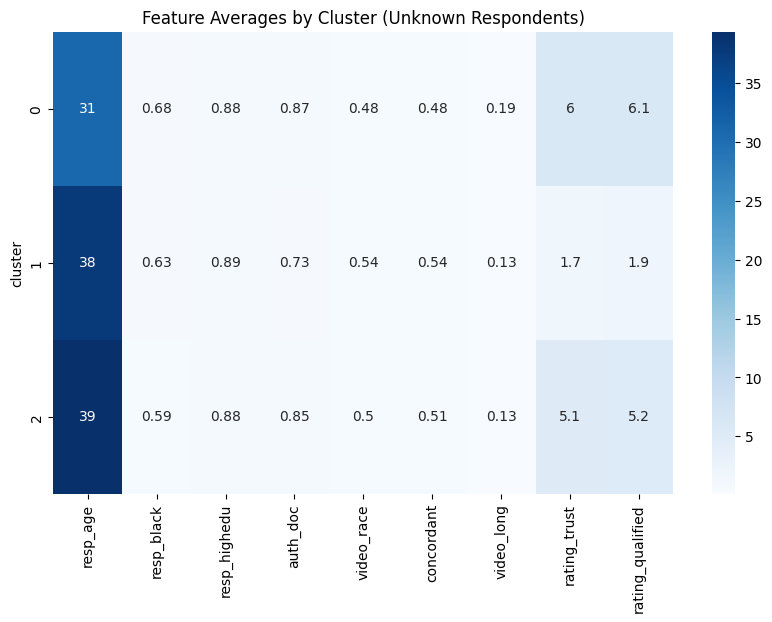

In [ ]:
cluster_means = resp_unknown.groupby('cluster')[features_for_clustering].mean()

plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap='Blues')
plt.title("Feature Averages by Cluster (Unknown Respondents)")
plt.show()

Bring back orginally df stats to provide comparison

In [ ]:
survey_df.describe()

,id,resp_male,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,watch_video,rating_trust,rating_qualified
count,2893.000000,2893.0,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,11430.949188,1.0,36.826132,0.577947,0.883166,0.851365,0.501901,0.504321,0.141721,1.136882,5.145524,5.225026
std,4927.858611,0.0,6.742281,0.493972,0.321278,0.355789,0.500083,0.500068,0.348824,0.611608,1.517274,1.476008
min,3882.000000,1.0,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7434.000000,1.0,31.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000
50%,10444.000000,1.0,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,5.000000
75%,15538.000000,1.0,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,6.000000
max,20809.000000,1.0,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,7.000000,7.000000


Bring in df stats to provide comparison

In [ ]:
resp_unknown_df.describe()

,id,resp_male,resp_age,resp_black,resp_highedu,auth_doc,video_race,concordant,video_long,watch_video,rating_trust,rating_qualified,cluster
count,2228.000000,2228.0,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,11742.942101,1.0,36.364004,0.621185,0.879713,0.842460,0.497307,0.504488,0.152603,1.162926,5.108169,5.184919,1.212747
std,5085.342202,0.0,6.680998,0.485201,0.325370,0.364391,0.500105,0.500092,0.359685,0.669382,1.526143,1.501655,0.926862
min,3888.000000,1.0,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,7486.500000,1.0,31.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,0.000000
50%,11100.500000,1.0,35.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,5.000000,2.000000
75%,16131.750000,1.0,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,6.000000,2.000000
max,20809.000000,1.0,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,7.000000,7.000000,2.000000


I notice between the comparison for the orginal df and the unknown_df that the percentage `'resp_black'` are differnt and a small shift in `'resp_age'` for each quartile.

In [ ]:
cluster_group = cluster_group.T
display(cluster_group)

cluster,0,1,2
resp_age,31.066234,37.850467,39.387460
resp_black,0.676623,0.630841,0.585209
resp_highedu,0.880519,0.887850,0.877814
auth_doc,0.868831,0.728972,0.845659
video_race,0.483117,0.537383,0.499196
concordant,0.484416,0.542056,0.510450
video_long,0.190909,0.126168,0.133441
rating_trust,6.010390,1.700935,5.135852
rating_qualified,6.074026,1.915888,5.196945
size,770.000000,214.000000,1244.000000


## ***Conclusions***


---


Cluster 0 — 770 People

* avg age = 31 (Youngest Group | 25%)
* 68% Black respondents (Highly Black)
* 88% Highly educated
* 48% recieved a concordant
* 6 medium high trust
* 6 medium high qualification rating

---

Cluster 1 — 214 People

* avg age = 38 (Relatively High)
* 63% Black respondents (Relatively High Black)
* 88.7% Highly educated
* 54% recieved a concordant
* 1.7 *very* low trust
* 1.91 *very* low qualification rating

---
Cluster 3 — 1244 People

* avg age = 39 (Relatively High)
* 58% Black respondents (Medium Black)
* 87.7% Highly educated
* 51% recieved a concordant
* 5 medium low trust
* 5 medium low qualification rating



# Overall Reflection:
I used K-Means clustering on respondents who did not answer whether they received a flu shot `'Unknown'`.
The goal was to explore whether this group had identifiable demographic or patterns.
The clustering revealed distinct subgroups, for example, cluster 1 overrepresented Black respondents with lower trust.
This pattern supports the hypothesis that vaccine hesitancy or disengagement may be more common among specific demographic groups than that of others.
These insights can guide targeted communication strategies to increase engagement in vaccination discussions. For further evaluation I should ideify groups amongst the data in which individuals did respond to `'el_flushot'` and filter for cluster amongst those indivduals.

Lingering Questions:
For the `'rating_trust'` and `'rating_qualified'` I still relect on what the 1 means